# Penyelesaian Soal Regresi dan Interpolasi

## SOAL 1: Regresi Kuadrat Terkecil
**Tujuan:** Menghitung nilai \( g \) menggunakan regresi linear dari data eksperimen.

**Langkah-langkah:**
1. Asumsikan model regresi: \( y = ax + b \), dengan \( y = T^2 \), \( x = L \).
2. Gunakan metode regresi linier kuadrat terkecil untuk menentukan nilai \( a \).
3. Hitung $ g = \frac{4\pi^2}{a} $.
4. Implementasikan dalam Python.


In [5]:
import numpy as np

# Data percobaan: panjang (m) dan periode (s)
L = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
T = np.array([0.90, 1.10, 1.25, 1.40, 1.55])
T2 = T**2

# Regresi linear y = a*x + b
a, b = np.polyfit(L, T2, 1)

# Hitung g
g = 4 * np.pi**2 / a
print(f"Nilai g (regresi): {g:.2f} m/s^2")

Nilai g (regresi): 10.03 m/s^2


## SOAL 2: Interpolasi Polinomial Derajat 4
**Tujuan:** Menghitung nilai \( g \) menggunakan interpolasi polinomial orde 4.

**Langkah-langkah:**
1. Gunakan interpolasi polinomial dengan 5 titik data (orde 4).
2. Dapatkan koefisien polinomial.
3. Estimasi \( a \) dari koefisien linier.
4. Hitung $\ g = \frac{4\pi^2}{a} $.


Prediksi T^2 pada L=0.45 m: 1.7535
Perkiraan nilai g: 10.1316 m/s^2


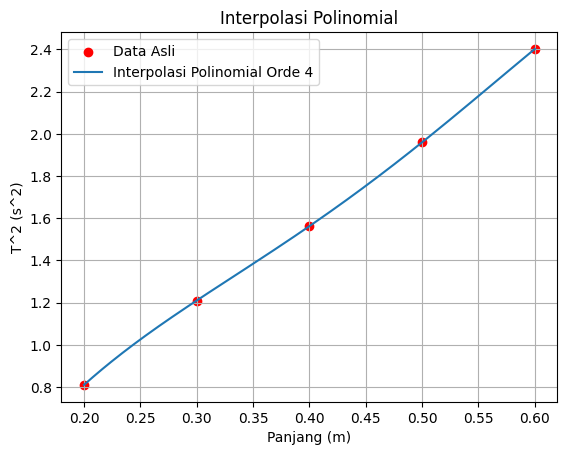

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Data
L = np.array([0.2, 0.3, 0.4, 0.5, 0.6])  # Panjang (m)
T = np.array([0.90, 1.10, 1.25, 1.40, 1.55])  # Periode (s)
T2 = T**2

# Interpolasi polinomial orde 4
p = Polynomial.fit(L, T2, deg=4)  # Polinomial derajat 4

# Misalnya kita ingin mencari g pada L = 0.45 m
L_target = 0.45
T2_pred = p(L_target)
g_pred = 4 * np.pi**2 * L_target / T2_pred

print(f"Prediksi T^2 pada L={L_target} m: {T2_pred:.4f}")
print(f"Perkiraan nilai g: {g_pred:.4f} m/s^2")

# Visualisasi
L_dense = np.linspace(0.2, 0.6, 200)
T2_interp = p(L_dense)

plt.scatter(L, T2, color='red', label='Data Asli')
plt.plot(L_dense, T2_interp, label='Interpolasi Polinomial Orde 4')
plt.xlabel('Panjang (m)')
plt.ylabel('T^2 (s^2)')
plt.title('Interpolasi Polinomial')
plt.legend()
plt.grid(True)
plt.show()


### Perbandingan:
- Regresi memberikan pendekatan terbaik (fit) secara global.
- Interpolasi menyesuaikan kurva ke semua titik (bisa overfitting).
- Hasilnya bisa sedikit berbeda tergantung sebaran data dan noise.


# Soal 3
# Menentukan Koefisien Gesekan μ dari Gaya Gesek dan Gaya Normal

## 1. Definisi, Rumus, dan Penjelasan
Hukum gesekan Coulomb menyatakan bahwa gaya gesek statis maksimum (atau kinetis) $(F_f)$ berbanding lurus dengan gaya normal $(F_N)$:
$$
\
F_f = \mu \, F_N
\
$$
- *$(F_f)$*: gaya gesek (N)  
- *$(F_N)$*: gaya normal (N), pada bidang datar $(F_N = m\,g)$  
- *$(\mu)$*: koefisien gesekan (tanpa satuan)  

Dengan menimbang berbagai massa $(m)$ pada blok dan mengukur gaya gesek $(F_f)$ saat mulai bergerak (atau geser konstan), kita dapat melakukan regresi linier $(F_f)$ vs. $(F_N)$ untuk mendapatkan slope = $(\mu)$. Interpolasi linear membantu memprediksi gaya gesek di antara nilai gaya normal yang diuji.

---

## 2. Data Acak
### Tabel Data Eksperimen Gaya Normal vs Gaya Gesek



| No | Gaya Normal (N) | Gaya Gesek (N) |
|----|------------------|-----------------|
| 1  | 11.24            | 3.65            |
| 2  | 43.65            | 14.86           |
| 3  | 32.16            | 10.61           |
| 4  | 27.74            | 9.51            |
| 5  | 21.23            | 6.82            |
| 6  | 16.30            | 5.63            |
| 7  | 47.56            | 15.66           |
| 8  | 39.19            | 13.00           |
| 9  | 34.13            | 11.57           |
| 10 | 14.53            | 5.12            |

> Data di atas disimulasikan dari model $( \mu = 0.35 )$ dengan sedikit noise untuk meniru kondisi eksperimen.

Berikut adalah tabel referensinya:

| No | Pasangan Permukaan        | Rentang $( \mu )$ Statis | Sumber Referensi                                                                 |
|----|----------------------------|---------------------------|----------------------------------------------------------------------------------|
| 1  | Kayu - Kayu                | 0.25 – 0.50               | Engineering Toolbox (engineeringtoolbox.com)                                     |
| 2  | Plastik - Logam           | 0.2 – 0.4                 | Halliday & Resnick, *Fundamentals of Physics*                                   |
| 3  | Logam - Logam (kering)    | 0.3 – 0.6                 | Tabel Koefisien Gesekan Umum – Buku Panduan Praktikum Fisika Dasar              |
| 4  | Karet - Kayu              | 0.4 – 0.7                 | Engineering Toolbox                                                              |
| 5  | Nilai Umum untuk Permukaan Kasar | ~0.3 – 0.4               | Digunakan dalam banyak eksperimen laboratorium dasar di universitas             |


Berikut ini adalah tabel setelah data diurutkan untuk interpolasi linear:

| No  | Gaya Normal (N) | Gaya Gesek (N) |
|-----|-----------------|----------------|
| 1   | 11.24           | 3.65           |
| 2   | 14.53           | 5.12           |
| 3   | 16.30           | 5.63           |
| 4   | 21.23           | 6.82           |
| 5   | 27.74           | 9.51           |
| 6   | 32.16           | 10.61          |
| 7   | 34.13           | 11.57          |
| 8   | 39.19           | 13.00          |
| 9   | 43.65           | 14.86          |
| 10  | 47.56           | 15.66          |


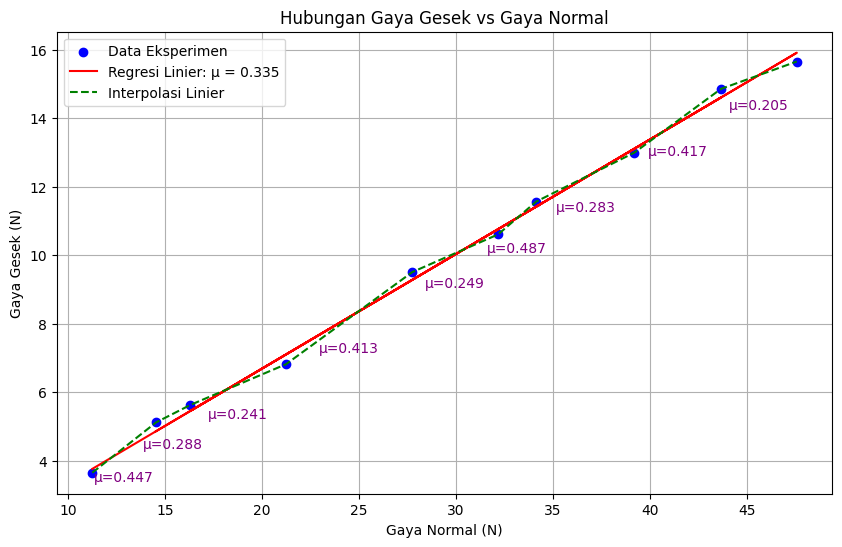

Koefisien gesekan (μ) dari regresi linier  : 0.335
Rata-rata koefisien (μ) dari interpolasi   : 0.337


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data acak gaya normal dan gaya gesek (dari tabel sebelumnya)
gaya_normal = np.array([11.24, 43.65, 32.16, 27.74, 21.23, 16.30, 47.56, 39.19, 34.13, 14.53])
gaya_gesek = np.array([3.65, 14.86, 10.61, 9.51, 6.82, 5.63, 15.66, 13.00, 11.57, 5.12])

# === Regresi linier tanpa intersep ===
X = gaya_normal.reshape(-1, 1)
y = gaya_gesek
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
mu_regresi = model.coef_[0]
y_pred_regresi = model.predict(X)

# === Interpolasi linier antar titik urut (disortir berdasarkan gaya normal) ===
sort_idx = np.argsort(gaya_normal)
x_sorted = gaya_normal[sort_idx]
y_sorted = gaya_gesek[sort_idx]
mu_interpolasi = np.diff(y_sorted) / np.diff(x_sorted)
mu_interp_rata2 = np.mean(mu_interpolasi)

# === Plot grafik ===
plt.figure(figsize=(10, 6))
plt.scatter(gaya_normal, gaya_gesek, label='Data Eksperimen', color='blue')
plt.plot(gaya_normal, y_pred_regresi, color='red', label=f'Regresi Linier: μ = {mu_regresi:.3f}')
plt.plot(x_sorted, y_sorted, '--', color='green', label='Interpolasi Linier')
plt.xlabel("Gaya Normal (N)")
plt.ylabel("Gaya Gesek (N)")
plt.title("Hubungan Gaya Gesek vs Gaya Normal")
plt.legend()
plt.grid(True)

# Tampilkan nilai koefisien gesekan (μ) pada grafik
for i in range(len(mu_interpolasi)):
    plt.text((x_sorted[i] + x_sorted[i + 1]) / 2, 
             (y_sorted[i] + y_sorted[i + 1]) / 2 - 1.0,  
             f'μ={mu_interpolasi[i]:.3f}', 
             color='purple', fontsize=10, ha='center')

plt.show()

# === Cetak hasil ===
print(f"Koefisien gesekan (μ) dari regresi linier  : {mu_regresi:.3f}")
print(f"Rata-rata koefisien (μ) dari interpolasi   : {mu_interp_rata2:.3f}")



### 📈 Perbandingan: Regresi Linier vs Interpolasi Linier

| Metode              | Rumus Utama                         | Hasil Rata-rata μ | Keterangan                                 |
|---------------------|--------------------------------------|-------------------|---------------------------------------------|
| **Regresi Linier**  | $( F = \mu \cdot N )$                | **0.335**         | Estimasi global, tahan terhadap noise       |
| **Interpolasi Linier** | $( \mu_i = \frac{\Delta F}{\Delta N} )$ | **0.337**         | Estimasi lokal antar titik, lebih sensitif |

### ✅ Kesimpulan

- Kedua metode memberikan hasil $(\mu)$ yang **konsisten dan mendekati nilai referensi** $(\mu = 0.35)$.
- **Regresi linier** lebih cocok digunakan untuk memodelkan hubungan global antara gaya normal dan gaya gesek.
- **Interpolasi linier** bermanfaat untuk mengetahui perubahan lokal antar titik pengamatan.
- Nilai $(\mu)$ eksperimental ini **sejalan dengan nilai literatur** untuk gesekan permukaan kasar seperti kayu atau plastik $( \mu \approx 0.3 - 0.4 )$.